# Geez Number Prediction

In this project will built and training Geez number prediction model. We will use a dataset consisting of Geez/ Amharic digits (1-9). We will  develop a deep, fully-connected ("feed-forward") neural network model that can classify these images. In the process we will discuss:<br>

* Data collection and preparation
* Implementing Deep feed forward Neural networks
  - Libraries
  - Reading Data with data generators
      - Data augmentation
* Transfer Learning

In [7]:
import keras
from keras_preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization, Activation
from keras.optimizers  import RMSprop, SGD, Adam
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
import os
from keras import models
import cv2

## Data Generators

**Motivation**

Data preparation is required when working with neural network and deep learning models. Increasingly data augmentation is also required on more complex object recognition tasks.

Like the rest of Keras, the image augmentation API is simple and powerful.

Keras provides the *ImageDataGenerator* class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:
* Sample-wise standardization.
* Feature-wise standardization.
* ZCA whitening.
* Random rotation, shifts, shear and flips.
* Dimension reordering.
* Save augmented images to disk.

In [2]:
## Using the ImageDataGenerator to: Provide a validation split of 20% of the data rescale the images, perform augmentation 
datagen = ImageDataGenerator(validation_split=0.2,
                             rescale=1./255 ,
                             shear_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             fill_mode='nearest',
                             horizontal_flip=True)

### Specify directory containing amharic dataset
TRAIN_DIR = 'amharic'


## Use train generator to create train data from entire dataset
train_generator = datagen.flow_from_directory(
    TRAIN_DIR, 
    subset='training',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical'
)

# use validation_generator to create dataset from 20% of the data
validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    subset='validation',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical'
)

Found 95 images belonging to 9 classes.
Found 18 images belonging to 9 classes.


# Geez /Amharic Number system

Ethiopic numerals have a familiar quality about them that seems to catch the eye and pique the imagination of the first-time viewer. In particular, the bars above and below the letter-like symbols appear reminiscent of their Roman counterparts. The symbols in between the bars, however, are clearly not of Roman origin. The shapes appear Ethiopic but only half seem to correspond to Ethiopic syllables and in an incomprehensible order.

![alt text](https://www.geez.org/Numerals/images/NumberTable2-cropped.gif)

# Data Description

Dataset consists of images of Amharic numbers mostly extracted from the internet. The Idea here is to train a machine learning model, specifically a deep convolutional neural network to learn to recognize the amharic numbers.

## Data preparation

The images were rescaled to 200x200 px with the help of the data generators. 

### Note:

In this tutorial, the dataset was not standardized as in the MNIST dataset, an additional task is to use the lessons learnt from the computer vision class to standardize the dataset to have consistent backgrounds like that from the MNIST dataset.

![alt text](https://conx.readthedocs.io/en/latest/_images/MNIST_6_0.png)



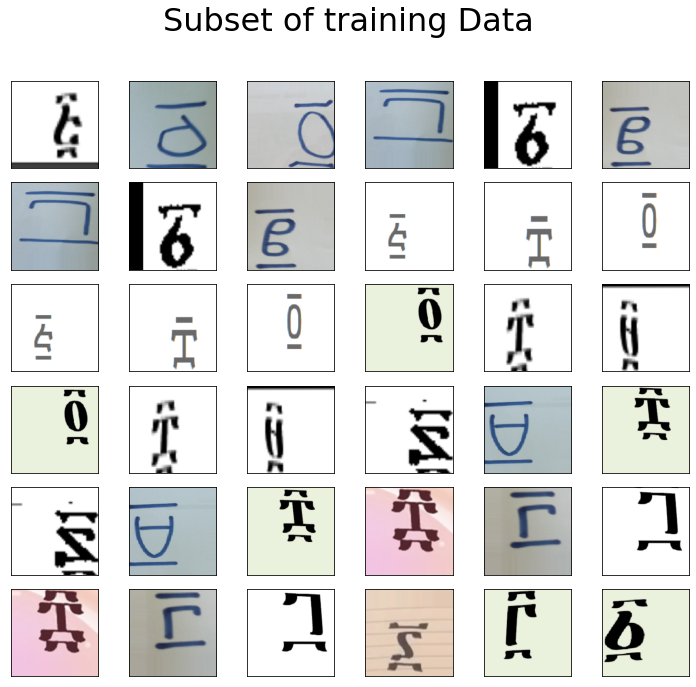

In [3]:
def plot_images(img_gen, img_title):
    fig, ax = plt.subplots(6,6, figsize=(10,10))
    plt.suptitle(img_title, size=32)
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    for (img, label) in img_gen:
        for i in range(6):
            for j in range(6):
                if i*6 + j < 256:
                    ax[i][j].imshow(img[i*3 + j])
        break

plot_images(train_generator, "Subset of training Data")

In [4]:
!mkdir preview

img = load_img('amharic/1/Annotation 2019-05-23 124618.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

# Computer Vision 

First we will cover non deep learning approaches used to pre-process and analyse images 


**1.   Otsu Thresholding**

Segment out the actual image


A technique used to create a binary image that can be used in a fully connected network model
Create image resized to fit into a CNN



In [5]:
from skimage.filters import threshold_otsu

amharic = './amharic/3/Annotation 2019-05-23 125407.png'

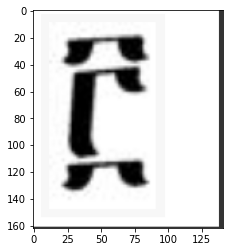

In [8]:
img = cv2.imread(amharic)
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

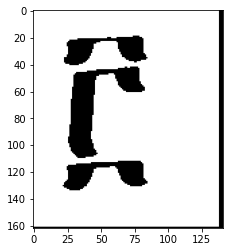

In [9]:
# Get threshold from image
threshold_value = threshold_otsu(imggray)
img_background = imggray > threshold_value


bimage = img_background.astype(np.int)
bimage2 = img_background.astype(np.uint8)
plt.imshow(bimage2, cmap='gray')


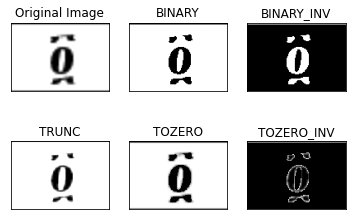

In [10]:
img = cv2.imread('amharic/4/Annotation 2019-05-23 125039.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### 2. Edge Detection

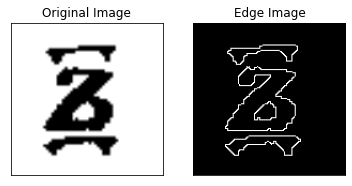

In [11]:
img = cv2.imread('amharic/6/Annotation 2019-05-23 125918.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## 3. Template Matching

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.


### 3.1 Single Object template Matching

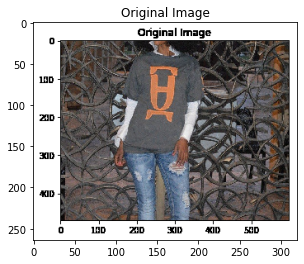

In [15]:
image = cv2.imread('geez_number.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

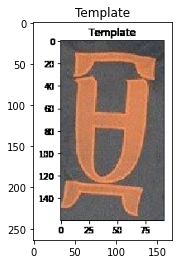

In [17]:
template = cv2.imread('geez_template.jpg')
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title("Template")
plt.show()

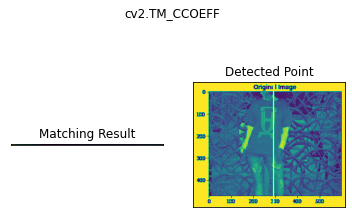

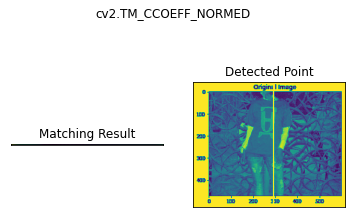

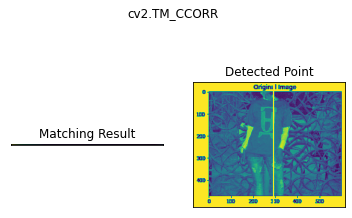

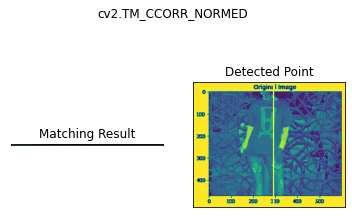

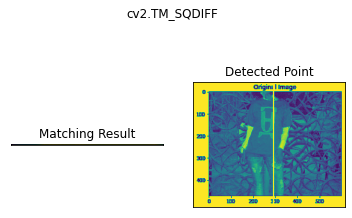

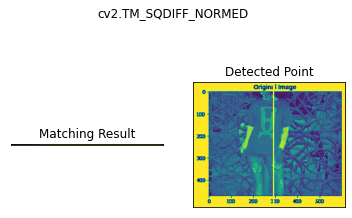

In [18]:
img = cv2.imread('geez_number.jpg',0)
img2 = img.copy()
template = cv2.imread('geez_template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
plt.imshow(img)
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res)
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()